**Window Size = 5 and Embedding = 32**

In [1]:
import requests

url = "https://cs.stanford.edu/people/karpathy/char-rnn/warpeace_input.txt"
resp = requests.get(url)
resp.raise_for_status()

text_data = resp.text
print(text_data[:500])


ï»¿"Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by that
Antichrist--I really believe he is Antichrist--I will have nothing more
to do with you and you are no longer my friend, no longer my 'faithful
slave,' as you call yourself! But how do you do? I see I have frightened
you--sit down and tell me all the news."

It was in July, 180


In [2]:
import re
# Remove any characters that are not letters, numbers, or periods
line = re.sub(r'[^a-zA-Z0-9\.]', ' ', text_data)
line = line.lower()
# Split into words and remove periods at the end of words
words = [word[:-1] if word.endswith('.') and word != '.' else word for word in line.split()]

In [3]:
words = line.split()
print(words)


['well', 'prince', 'so', 'genoa', 'and', 'lucca', 'are', 'now', 'just', 'family', 'estates', 'of', 'the', 'buonapartes.', 'but', 'i', 'warn', 'you', 'if', 'you', 'don', 't', 'tell', 'me', 'that', 'this', 'means', 'war', 'if', 'you', 'still', 'try', 'to', 'defend', 'the', 'infamies', 'and', 'horrors', 'perpetrated', 'by', 'that', 'antichrist', 'i', 'really', 'believe', 'he', 'is', 'antichrist', 'i', 'will', 'have', 'nothing', 'more', 'to', 'do', 'with', 'you', 'and', 'you', 'are', 'no', 'longer', 'my', 'friend', 'no', 'longer', 'my', 'faithful', 'slave', 'as', 'you', 'call', 'yourself', 'but', 'how', 'do', 'you', 'do', 'i', 'see', 'i', 'have', 'frightened', 'you', 'sit', 'down', 'and', 'tell', 'me', 'all', 'the', 'news.', 'it', 'was', 'in', 'july', '1805', 'and', 'the', 'speaker', 'was', 'the', 'well', 'known', 'anna', 'pavlovna', 'scherer', 'maid', 'of', 'honor', 'and', 'favorite', 'of', 'the', 'empress', 'marya', 'fedorovna.', 'with', 'these', 'words', 'she', 'greeted', 'prince', 'vas

In [4]:
len(words)

572182

In [5]:
unique_words = []
for w in words:
  if w.endswith('.') and w != '.':
        w = w[:-1]
  if w not in unique_words:
    unique_words.append(w)

print(unique_words)


['well', 'prince', 'so', 'genoa', 'and', 'lucca', 'are', 'now', 'just', 'family', 'estates', 'of', 'the', 'buonapartes', 'but', 'i', 'warn', 'you', 'if', 'don', 't', 'tell', 'me', 'that', 'this', 'means', 'war', 'still', 'try', 'to', 'defend', 'infamies', 'horrors', 'perpetrated', 'by', 'antichrist', 'really', 'believe', 'he', 'is', 'will', 'have', 'nothing', 'more', 'do', 'with', 'no', 'longer', 'my', 'friend', 'faithful', 'slave', 'as', 'call', 'yourself', 'how', 'see', 'frightened', 'sit', 'down', 'all', 'news', 'it', 'was', 'in', 'july', '1805', 'speaker', 'known', 'anna', 'pavlovna', 'scherer', 'maid', 'honor', 'favorite', 'empress', 'marya', 'fedorovna', 'these', 'words', 'she', 'greeted', 'vasili', 'kuragin', 'a', 'man', 'high', 'rank', 'importance', 'who', 'first', 'arrive', 'at', 'her', 'reception', 'had', 'cough', 'for', 'some', 'days', 'said', 'suffering', 'from', 'la', 'grippe', 'being', 'then', 'new', 'word', 'st', 'petersburg', 'used', 'only', 'elite', 'invitations', 'wit

In [6]:
len(unique_words)

18337

In [7]:
word_counts = {}
for w in words:
  if w.endswith('.') and w != '.':
    w = w[:-1]
  if w in word_counts.keys():
    word_counts[w] = word_counts[w] + 1
  else:
    word_counts[w] = 1

In [8]:
print(word_counts)

{'well': 740, 'prince': 1925, 'so': 1888, 'genoa': 3, 'and': 22221, 'lucca': 2, 'are': 1264, 'now': 1328, 'just': 567, 'family': 144, 'estates': 39, 'of': 14885, 'the': 34544, 'buonapartes': 1, 'but': 4038, 'i': 4478, 'warn': 6, 'you': 3758, 'if': 1294, 'don': 536, 't': 1161, 'tell': 375, 'me': 1244, 'that': 8169, 'this': 2066, 'means': 67, 'war': 296, 'still': 676, 'try': 71, 'to': 16667, 'defend': 18, 'infamies': 1, 'horrors': 8, 'perpetrated': 3, 'by': 2414, 'antichrist': 5, 'really': 195, 'believe': 123, 'he': 9998, 'is': 3311, 'will': 1066, 'have': 1974, 'nothing': 466, 'more': 1054, 'do': 1040, 'with': 5662, 'no': 1395, 'longer': 176, 'my': 1226, 'friend': 180, 'faithful': 12, 'slave': 11, 'as': 4025, 'call': 91, 'yourself': 112, 'how': 1002, 'see': 720, 'frightened': 117, 'sit': 69, 'down': 699, 'all': 2788, 'news': 171, 'it': 5576, 'was': 7357, 'in': 8975, 'july': 13, '1805': 21, 'speaker': 16, 'known': 146, 'anna': 293, 'pavlovna': 152, 'scherer': 7, 'maid': 61, 'honor': 157, 

In [9]:
top_10 = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])
print(top_10)

least_10 = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=False)[:10])
print(least_10)

{'the': 34544, 'and': 22221, 'to': 16667, 'of': 14885, 'a': 10544, 'he': 9998, 'in': 8975, 'that': 8169, 'his': 7983, 'was': 7357}
{'buonapartes': 1, 'infamies': 1, 'elite': 1, 'grandfathers': 1, 'canceled': 1, 'tease': 1, 'stale': 1, 'impulsiveness': 1, 'enthusiast': 1, 'noblest': 1}


In [10]:
import re
from collections import deque

# ---------- CONFIG ----------
window_size = 5
pad_token = '.'      # token used for padding display at paragraph start
# ----------------------------

# Split into paragraphs on one or more blank lines
paragraphs = re.split(r'(?:\n\s*\n+|[.?!]\s{3,})', line.strip())

# containers for all pairs
X = []
y = []

for para in paragraphs:
    # normalize paragraph internals
    para = para.replace('\n', ' ')
    # make '.' a separate token so "woman." -> "woman ."
    para = re.sub(r'([.])', r' \1 ', para)
    para = re.sub(r'\s+', ' ', para).strip()
    if not para:
        continue

    words = para.split()

    # Initialize context with pads at the *start of each paragraph*
    context = deque([pad_token] * window_size, maxlen=window_size)

    # For each token in this paragraph, create (context, token) pair
    for word in words:
        X.append(list(context))
        y.append(word)
        context.append(word)

    # After finishing this paragraph, reset context for the next paragraph
    # (This ensures the next paragraph starts with pad_token context)
    context = deque([pad_token] * window_size, maxlen=window_size)

# --- PRINTING: only show ". . . . . ---> word" for actual paragraph starts ---
# When the stored X for a pair is ALL pad_token, that pair is the first pair
# of a paragraph (because we initialized context to pads at paragraph start).

max = 100
for xi, yi in zip(X, y):
    max -= 1
    if max < 0:
        break
    if all(tok == pad_token for tok in xi):
        # Paragraph-start: show pads separated by space like ". . . . . ---> word"
        print(' '.join(xi), "--->", yi)
    else:
        # Normal context display in bracket form [a,b,c] ---> y (no spaces after commas)
        print(f"[{','.join(xi)}] ---> {yi}")


. . . . . ---> well
[.,.,.,.,well] ---> prince
[.,.,.,well,prince] ---> so
[.,.,well,prince,so] ---> genoa
[.,well,prince,so,genoa] ---> and
[well,prince,so,genoa,and] ---> lucca
[prince,so,genoa,and,lucca] ---> are
[so,genoa,and,lucca,are] ---> now
[genoa,and,lucca,are,now] ---> just
[and,lucca,are,now,just] ---> family
[lucca,are,now,just,family] ---> estates
[are,now,just,family,estates] ---> of
[now,just,family,estates,of] ---> the
[just,family,estates,of,the] ---> buonapartes
[family,estates,of,the,buonapartes] ---> .
[estates,of,the,buonapartes,.] ---> but
[of,the,buonapartes,.,but] ---> i
[the,buonapartes,.,but,i] ---> warn
[buonapartes,.,but,i,warn] ---> you
[.,but,i,warn,you] ---> if
[but,i,warn,you,if] ---> you
[i,warn,you,if,you] ---> don
[warn,you,if,you,don] ---> t
[you,if,you,don,t] ---> tell
[if,you,don,t,tell] ---> me
[you,don,t,tell,me] ---> that
[don,t,tell,me,that] ---> this
[t,tell,me,that,this] ---> means
[tell,me,that,this,means] ---> war
[me,that,this,means,war] 

**Creating the dataset**

In [11]:
# Recreate unique_words, all_words, stoi, and itos from X and y to ensure vocabulary consistency
all_words_in_xy = sorted(list(set([w for context in X for w in context] + y)))
special_tokens = ['<PAD>', '<UNK>', '<BOS>', '<EOS>']
all_words = special_tokens + all_words_in_xy

# Create the mapping from words to integers and vice versa
stoi = {w: i for i, w in enumerate(all_words)}
itos = {i: w for i, w in enumerate(all_words)}

# Convert the text data to integer indices
X_idx = [[stoi.get(w, stoi['<UNK>']) for w in context] for context in X]
y_idx = [stoi.get(word, stoi['<UNK>']) for word in y]

# Print some examples to verify
print("Original X:", X[:5])
print("X_idx:", X_idx[:5])
print("Original y:", y[:5])
print("y_idx:", y_idx[:5])
print("stoi size:", len(stoi))

Original X: [['.', '.', '.', '.', '.'], ['.', '.', '.', '.', 'well'], ['.', '.', '.', 'well', 'prince'], ['.', '.', 'well', 'prince', 'so'], ['.', 'well', 'prince', 'so', 'genoa']]
X_idx: [[4, 4, 4, 4, 4], [4, 4, 4, 4, 17069], [4, 4, 4, 17069, 11789], [4, 4, 17069, 11789, 14279], [4, 17069, 11789, 14279, 6660]]
Original y: ['well', 'prince', 'so', 'genoa', 'and']
y_idx: [17069, 11789, 14279, 6660, 637]
stoi size: 17515


In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class WordContextDataset(Dataset):
    def __init__(self, X_list, y_list):
        self.X = X_list
        self.y = y_list

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        # Convert to tensor on-the-fly
        X_tensor = torch.tensor(self.X[idx], dtype=torch.long)
        y_tensor = torch.tensor(self.y[idx], dtype=torch.long)
        return X_tensor, y_tensor


In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [14]:
from torch.utils.data import random_split
import numpy as np

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_idx, y_idx, test_size=0.2, random_state=42, shuffle=True
)

train_ds = WordContextDataset(X_train, y_train)
val_ds = WordContextDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=128, shuffle=False)

In [15]:
train_ds[0]

(tensor([4, 4, 4, 4, 4]), tensor(13119))

**Model Design and Training**

In [16]:
import torch
import torch.nn as nn
from tqdm import tqdm

In [17]:
class MLP(nn.Module):
  def __init__(self, vocab_size, embedding_dim, context_length, hidden_dim, activation_fn):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    input_dim = embedding_dim*context_length
    self.l1 = nn.Linear(input_dim, hidden_dim)
    self.bn1 = nn.BatchNorm1d(hidden_dim)
    self.l2 = nn.Linear(hidden_dim, hidden_dim)
    self.bn2 = nn.BatchNorm1d(hidden_dim)
    self.l3 = nn.Linear(hidden_dim,vocab_size)
    self.act = activation_fn
    self.dropout = nn.Dropout(0.7)

  def forward(self, x):
    emb = self.embedding(x)
    emb_flat = emb.view(emb.size(0), -1)
    h1 = self.act(self.bn1(self.l1(emb_flat)))
    h2 = self.act(self.bn2(self.l2(h1)))
    h1 = self.dropout(h1)
    h2 = self.dropout(h2)
    h2 = h2 + h1
    logits = self.l3(h2)
    return logits


In [18]:
vocab_size = len(stoi)
model = MLP(vocab_size = vocab_size, embedding_dim = 32, context_length = 5, hidden_dim=512, activation_fn = nn.ReLU())
model = model.to(device)

In [19]:
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=1e-3,          # start around 1e-3 or 5e-4
    weight_decay=5e-3 # helps prevent overfitting
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',      # minimize validation loss
    factor=0.7,      # reduce lr by 0.7x
    patience=3,      # after 2 epochs of no improvement
)

In [20]:
import numpy as np

train_losses, val_losses = [], []

# --- Variables for Early Stopping ---
best_val_loss = np.inf
patience = 5  # Number of epochs to wait after last improvement
patience_counter = 0
# ------------------------------------

# Train for a large number of epochs; early stopping will find the best one.
for epoch in range(500):
    model.train()
    running_loss = 0.0
    batch_count = 0

    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()

        running_loss += loss.item()
        batch_count += 1

    avg_train_loss = running_loss / batch_count
    train_losses.append(avg_train_loss)

    # -------------------- Validation --------------------
    model.eval()
    val_loss_sum = 0.0
    val_count = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            val_loss_sum += loss.item() * xb.size(0)
            val_count += xb.size(0)

    avg_val_loss = val_loss_sum / val_count
    val_losses.append(avg_val_loss)

    # Scheduler step
    scheduler.step(avg_val_loss)

    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch:03d} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | LR: {current_lr:.1e}")

    # --- Early Stopping and Model Saving Logic ---
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0  # Reset patience counter
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"  -> New best val loss. Model saved to 'best_model.pth'")
    else:
        patience_counter += 1
        print(f"  -> Val loss did not improve. Patience: {patience_counter}/{patience}")
        if patience_counter >= patience:
            print(f"  -> EARLY STOPPING. Best val loss was: {best_val_loss:.4f}")
            break # Exit the training loop

print("\nTraining finished.")


Epoch 000 | Train Loss: 7.0721 | Val Loss: 6.6039 | LR: 1.0e-03
  -> New best val loss. Model saved to 'best_model.pth'
Epoch 001 | Train Loss: 6.6568 | Val Loss: 6.4186 | LR: 1.0e-03
  -> New best val loss. Model saved to 'best_model.pth'
Epoch 002 | Train Loss: 6.4619 | Val Loss: 6.3075 | LR: 1.0e-03
  -> New best val loss. Model saved to 'best_model.pth'
Epoch 003 | Train Loss: 6.3281 | Val Loss: 6.2428 | LR: 1.0e-03
  -> New best val loss. Model saved to 'best_model.pth'
Epoch 004 | Train Loss: 6.2295 | Val Loss: 6.1926 | LR: 1.0e-03
  -> New best val loss. Model saved to 'best_model.pth'
Epoch 005 | Train Loss: 6.1567 | Val Loss: 6.1581 | LR: 1.0e-03
  -> New best val loss. Model saved to 'best_model.pth'
Epoch 006 | Train Loss: 6.0935 | Val Loss: 6.1307 | LR: 1.0e-03
  -> New best val loss. Model saved to 'best_model.pth'
Epoch 007 | Train Loss: 6.0460 | Val Loss: 6.1096 | LR: 1.0e-03
  -> New best val loss. Model saved to 'best_model.pth'
Epoch 008 | Train Loss: 6.0005 | Val Los

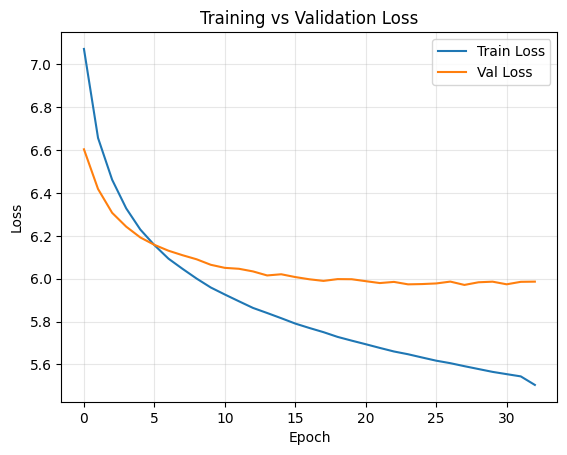

In [21]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [22]:
len(X_train), len(X_test), len(y_train), len(y_test), len(X), len(y)

(473702, 118426, 473702, 118426, 592128, 592128)

In [23]:
import torch
import torch.nn.functional as F

def predict_next_word(model, sentence, stoi, itos, context_length=3, device='cuda'):
    """
    Predicts the next word given a model and a sentence.

    Args:
        model: Your trained MLP model.
        sentence: A string (e.g., "he said to")
        stoi: Your string-to-index vocabulary map.
        itos: Your index-to-string vocabulary map.
        context_length: The context size your model was trained on (3).
        device: The device your model is on ('cuda' or 'cpu').
    """

    # 1. Set model to evaluation mode (disables dropout, etc.)
    model.eval()

    # 2. Process the input sentence
    words = sentence.lower().split()

    # 3. Get the last 'context_length' words
    if len(words) < context_length:
        raise ValueError(f"Sentence must be at least {context_length} words long.")

    context_words = words[-context_length:]

    # 4. Convert words to indices, handling unknown words
    # Use stoi.get(word, stoi['<UNK>']) to avoid errors
    indices = [stoi.get(w, stoi['<UNK>']) for w in context_words]

    # 5. Convert indices to the correct tensor shape
    # (batch_size=1, context_length)
    xb = torch.tensor(indices, dtype=torch.long).unsqueeze(0).to(device)

    # 6. Get predictions
    with torch.no_grad(): # No need to track gradients for prediction
        logits = model(xb)

    # 7. Get the index of the most likely next word
    # torch.argmax finds the index with the highest logit value
    pred_index = torch.argmax(logits, dim=1).item()

    # 8. Convert the index back to a word
    predicted_word = itos[pred_index]

    return predicted_word



In [24]:
# --- This is a new cell ---

# 1. Make sure your model (the class MLP) is defined
# (It is already defined in Cell 40 of your notebook)

# 2. Load the best weights you saved during training
# We use the model from 'best_model.pth' which had the lowest validation loss
try:
    model.load_state_dict(torch.load('best_model.pth'))
    model = model.to(device) # Ensure model is on the correct device
    print("Successfully loaded 'best_model.pth'")
except Exception as e:
    print(f"Error loading model: {e}")
    print("--- PLEASE ENSURE YOU HAVE RUN THE TRAINING LOOP THAT SAVES 'best_model.pth' ---")

context_length = 5
test_sentence_1 = "the prince said to his"
test_sentence_2 = "it was a very cold"
test_sentence_3 = "she looked at him and"

    # --- Example 1 ---
pred_1 = predict_next_word(model, test_sentence_1, stoi, itos, context_length, device)
print(f"Input: '{test_sentence_1}'  ->  Predicted: '{pred_1}'")
print(f"Full sentence: '{test_sentence_1} {pred_1}'")

    # --- Example 2 ---
pred_2 = predict_next_word(model, test_sentence_2, stoi, itos, context_length, device)
print(f"\nInput: '{test_sentence_2}'  ->  Predicted: '{pred_2}'")
print(f"Full sentence: '{test_sentence_2} {pred_2}'")

    # --- Example 3 ---
    # This will use the last 3 words: "to the"
pred_3 = predict_next_word(model, test_sentence_3, stoi, itos, context_length, device)
print(f"\nInput: '{test_sentence_3}'  ->  Predicted: '{pred_3}'")
print(f"Full sentence: '{test_sentence_3} {pred_3}'")



Successfully loaded 'best_model.pth'
Input: 'the prince said to his'  ->  Predicted: 'own'
Full sentence: 'the prince said to his own'

Input: 'it was a very cold'  ->  Predicted: 'and'
Full sentence: 'it was a very cold and'

Input: 'she looked at him and'  ->  Predicted: 'was'
Full sentence: 'she looked at him and was'


Successfully loaded 'best_model.pth' onto CPU.
Successfully extracted embedding matrix of shape: (17515, 32)

Finding words in your vocabulary (stoi)...

Running t-SNE on 37 word embeddings...


/tmp/ipython-input-2128997813.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10', len(word_groups))


t-SNE finished.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


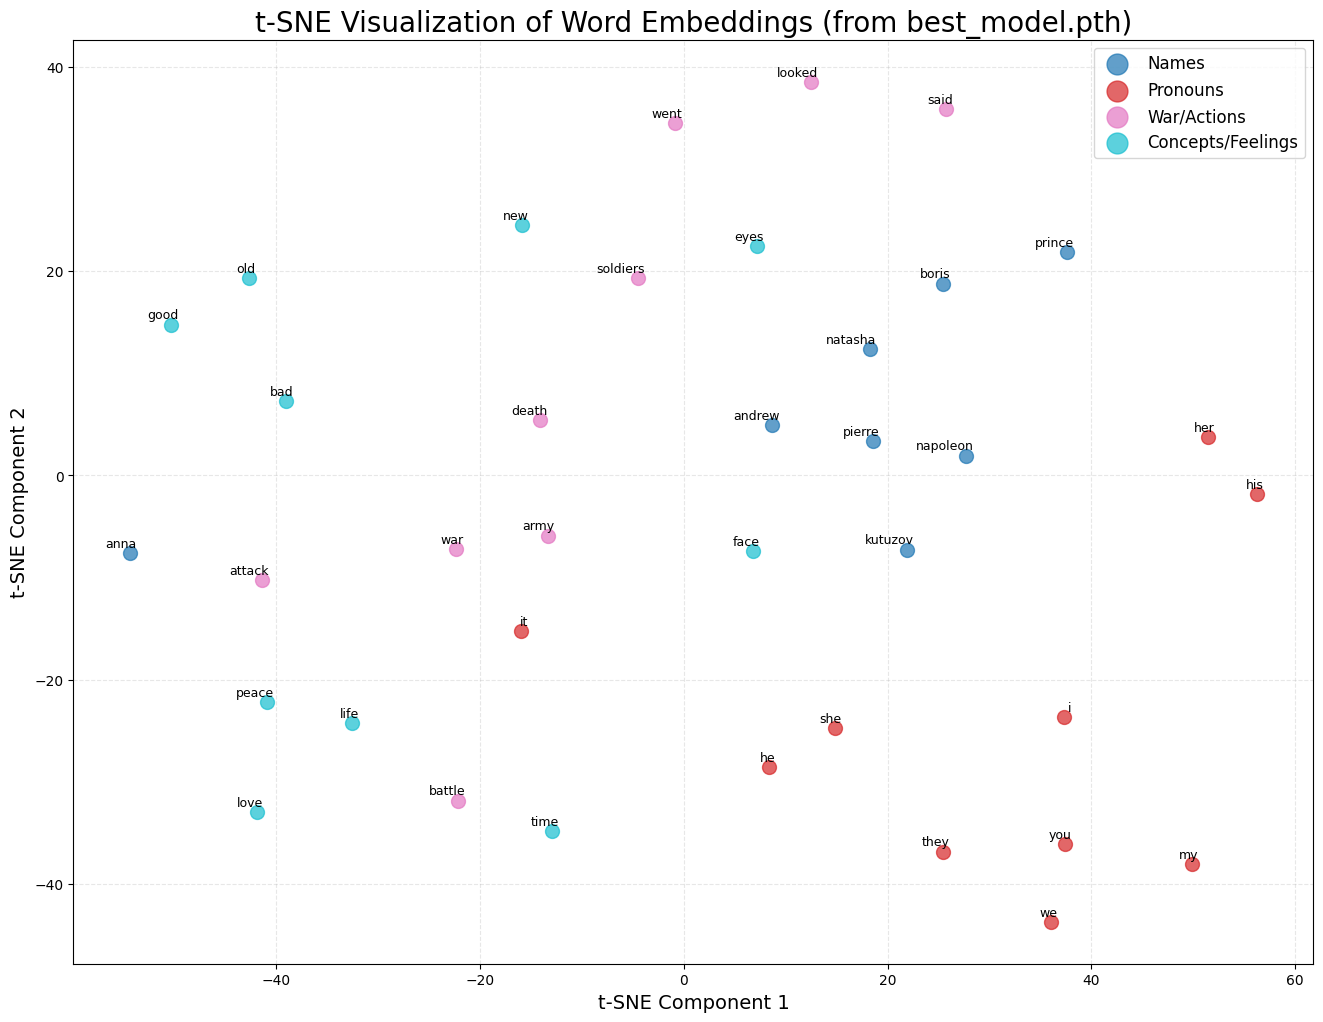

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings

# --- 1. Load your BEST model ---
# This is the most important step. We load the model you saved
# with the lowest validation loss, NOT the SWA model.

try:
    # Ensure the model is loaded onto the CPU for this
    model.load_state_dict(torch.load('best_model.pth', map_location=torch.device('cpu')))
    model.to('cpu') # Move model to CPU
    model.eval() # Set model to evaluation mode
    print("Successfully loaded 'best_model.pth' onto CPU.")
except Exception as e:
    print(f"Error loading 'best_model.pth': {e}")
    print("Please make sure you have run the training loop that saves 'best_model.pth'")

# --- 2. Setup: Define Word Groups ---
# We will select words from different categories to see if they cluster.
# (Feel free to change these words, but make sure they are in your vocabulary)
word_groups = {
    'Names': ['prince', 'anna', 'pierre', 'kutuzov', 'napoleon', 'boris', 'andrew', 'natasha'],
    'Pronouns': ['he', 'she', 'it', 'they', 'i', 'you', 'we', 'his', 'her', 'my'],
    'War/Actions': ['said', 'went', 'looked', 'war', 'battle', 'army', 'soldiers', 'attack', 'death'],
    'Concepts/Feelings': ['peace', 'love', 'life', 'good', 'bad', 'old', 'new', 'time', 'face', 'eyes']
}

# --- 3. Extract Target Embeddings ---
# Get the complete embedding matrix from your model's 'embedding' layer
try:
    embedding_matrix = model.embedding.weight.data.cpu().numpy()
    print(f"Successfully extracted embedding matrix of shape: {embedding_matrix.shape}")
except Exception as e:
    print(f"Error: Could not get 'model.embedding.weight.data'.")
    print("Please make sure your model variable is named 'model' and has an 'embedding' layer.")

# Create lists to hold the embeddings and labels for plotting
target_embeddings = []
target_labels = []
target_words = []
target_colors = []

# Map groups to colors
color_map = plt.cm.get_cmap('tab10', len(word_groups))
group_to_color = {group_name: color_map(i) for i, group_name in enumerate(word_groups.keys())}

print("\nFinding words in your vocabulary (stoi)...")
for group_name, words in word_groups.items():
    for word in words:
        if word in stoi:
            # Get the index of the word
            idx = stoi[word]
            # Get the embedding vector for that index
            target_embeddings.append(embedding_matrix[idx])
            # Store the word and its group for plotting
            target_words.append(word)
            target_labels.append(group_name)
            target_colors.append(group_to_color[group_name])
        else:
            print(f"  - Warning: '{word}' not in vocabulary (stoi). Skipping.")

if not target_embeddings:
    print("\nError: No target words were found in the vocabulary. Plotting cannot continue.")
    print("Please check your 'word_groups' list and the 'stoi' dictionary.")
else:
    # Convert list of embeddings to a numpy array
    target_embeddings = np.array(target_embeddings)

    # --- 4. Run t-SNE ---
    # t-SNE is computationally expensive, but our list is small.
    # We use a low perplexity because we have few data points per category.
    print(f"\nRunning t-SNE on {len(target_embeddings)} word embeddings...")

    # Suppress n_iter warning
    warnings.filterwarnings("ignore", ".*n_iter.*")

    tsne = TSNE(n_components=2,
                perplexity=10,  # Good for small datasets/groups
                random_state=42,
                n_iter=2000, # t-SNE default is 1000
                init='pca',
                learning_rate='auto')

    tsne_results = tsne.fit_transform(target_embeddings)
    print("t-SNE finished.")
    warnings.resetwarnings() # Reset warnings

    # --- 5. Plot the Results ---
    plt.figure(figsize=(16, 12))

    # Create a scatter plot for each group to build the legend
    for group_name, color in group_to_color.items():
        # Find the indices for words in this group
        indices = [i for i, label in enumerate(target_labels) if label == group_name]
        if indices:
            # Get the x, y coordinates
            x = tsne_results[indices, 0]
            y = tsne_results[indices, 1]
            plt.scatter(x, y, color=color, label=group_name, alpha=0.7, s=100)

    # Add text labels (annotations) to each point
    for i, word in enumerate(target_words):
        plt.annotate(word,
                     (tsne_results[i, 0], tsne_results[i, 1]),
                     xytext=(5, 2), # Small offset
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontsize=9)

    plt.title('t-SNE Visualization of Word Embeddings (from best_model.pth)', fontsize=20)
    plt.xlabel('t-SNE Component 1', fontsize=14)
    plt.ylabel('t-SNE Component 2', fontsize=14)
    plt.legend(loc='best', fontsize=12, markerscale=1.5)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()